In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
consumerKey = "lWh2wmrlCigj2eaq9fEXlQWma"
consumerSecret = "Ev7ZRz23Huc3e5SLlnOj7GLTINi6T3BsQiQj26LOYe1yjCXDbq"
accessToken = "1114738696836636673-NjnFTrc7ZoFSwdcTEdVB4i3AW2XYBw"
accessTokenSecret = "237ehINpcR8ZLIr6XVOEaiVtgSV457evFS3RKZdBu6W5b"

In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [4]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="rohit", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) RT @NSIN_us: This week our #52WeeksOfInnovation featured innovation principle is the HOW-NOW-WOW tool, which can be repurposed for pitching…

2) RT @austinfish: Hot damn, I am so excited to have this amazing group of humans as our guests for @HarvardHBS 4th annual #HBSStartupBootcamp…

3) RT @austinfish: 1/3 I’m tired of hearing people described as successful because of their wealth/power. I know plenty of extremely wealthy &amp;…

4) @jeffseibert @Wayne @digits wait, shouldn’t you be telling us how many digits, not words? JK. Congrats!!

5) Amazing - congrats!! https://t.co/qsiKSBT1sd



In [5]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,RT @NSIN_us: This week our #52WeeksOfInnovatio...
1,"RT @austinfish: Hot damn, I am so excited to h..."
2,RT @austinfish: 1/3 I’m tired of hearing peopl...
3,"@jeffseibert @Wayne @digits wait, shouldn’t yo..."
4,Amazing - congrats!! https://t.co/qsiKSBT1sd


In [6]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,_us: This week our 52WeeksOfInnovation feature...
1,": Hot damn, I am so excited to have this amazi..."
2,: 1/3 I’m tired of hearing people described as...
3,"wait, shouldn’t you be telling us how many ..."
4,Amazing - congrats!!
...,...
94,I hope dessert is next.
95,did you make it??
96,mixed. Also Brent / Semil you guys are bot...
97,"we haven't raised our A, but I definitely ..."


In [7]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,_us: This week our 52WeeksOfInnovation feature...,0.000000,0.000000
1,": Hot damn, I am so excited to have this amazi...",0.833333,0.408333
2,: 1/3 I’m tired of hearing people described as...,0.883333,0.283333
3,"wait, shouldn’t you be telling us how many ...",0.500000,0.781250
4,Amazing - congrats!!,0.900000,0.937500
...,...,...,...
94,I hope dessert is next.,0.000000,0.000000
95,did you make it??,0.000000,0.000000
96,mixed. Also Brent / Semil you guys are bot...,0.458333,0.225000
97,"we haven't raised our A, but I definitely ...",0.500000,0.000000


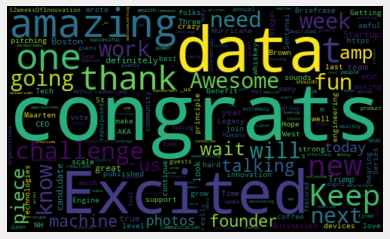

In [8]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,_us: This week our 52WeeksOfInnovation feature...,0.000000,0.000000,Neutral
1,": Hot damn, I am so excited to have this amazi...",0.833333,0.408333,Positive
2,: 1/3 I’m tired of hearing people described as...,0.883333,0.283333,Positive
3,"wait, shouldn’t you be telling us how many ...",0.500000,0.781250,Positive
4,Amazing - congrats!!,0.900000,0.937500,Positive
...,...,...,...,...
94,I hope dessert is next.,0.000000,0.000000,Neutral
95,did you make it??,0.000000,0.000000,Neutral
96,mixed. Also Brent / Semil you guys are bot...,0.458333,0.225000,Positive
97,"we haven't raised our A, but I definitely ...",0.500000,0.000000,Neutral


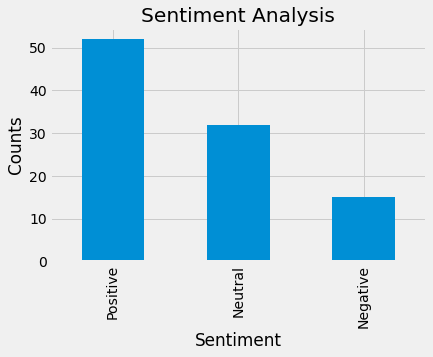

In [10]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()